## Понижение размерности с помощью PCA

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Подготовка данных

In [4]:
train = np.loadtxt('../datas/digit/train.csv', delimiter=',', skiprows=1)

In [6]:
train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]])

In [7]:
train.shape

(42000, 785)

In [5]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]

In [8]:
train_label.shape

(42000,)

In [13]:
len(train[:, 1:])

42000

In [10]:
# Приводим раземерность к удобному для обработки виду
train_img = np.reshape(train[:, 1:], (len(train[:, 1:]), 28, 28))

In [11]:
train_img.shape

(42000, 28, 28)

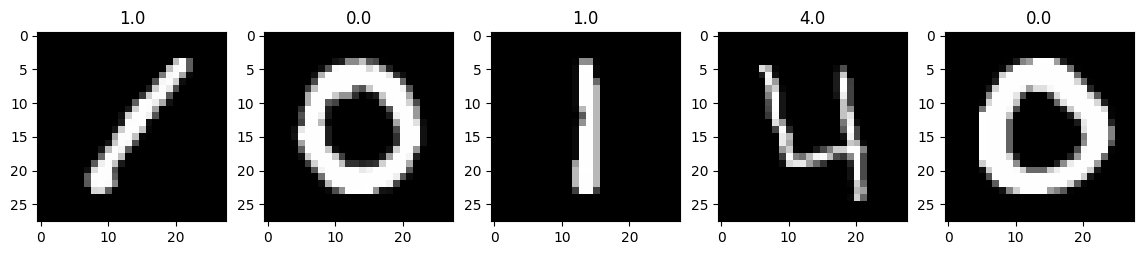

In [20]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title(f"{train_label[i - 1]}");

## Выбираем семпл для обработки

In [23]:
# Случаяным образом из 42,000 значений выбираем 10,000:
choices = np.random.choice(train_img.shape[0], 10000)

In [27]:
y = train_label[choices]
X = train_img[choices].reshape(-1, 28 * 28).astype(np.float32)

In [28]:
X.shape

(10000, 784)

## Центрируем данные

In [30]:
X_mean = X.mean(axis=0)
X_mean.shape

(784,)

In [32]:
X -= X_mean

In [33]:
X.shape

(10000, 784)

## Матрица ковариации признаков

In [35]:
cov = np.dot(X.T, X) / X.shape[0]

In [37]:
cov.shape

(784, 784)

## Собственные вектора матрыцы ковариации и собственные значения

- U - собственные вектора матрыцы ковариации,
- S - собственные значения

In [38]:
U, S, _ = np.linalg.svd(cov)

In [39]:
U.shape

(784, 784)

In [40]:
S.shape

(784,)

## Собственные числа

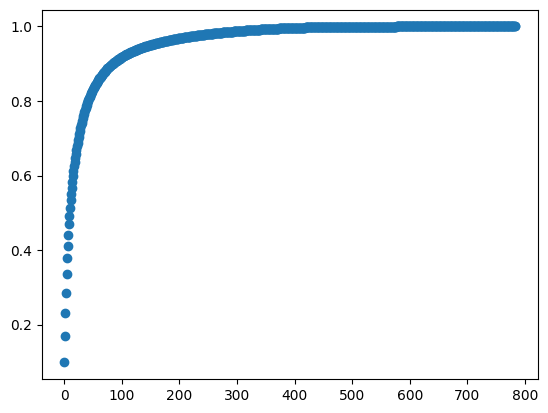

In [41]:
# Накопленная сумма собственных значений
S_cumsum = np.cumsum(S) / np.sum(S)
plt.plot(S_cumsum, 'o')

In [47]:
for i in range(5):
    print('[%03d] %.3f' % (i, S_cumsum[i]))

[000] 0.098
[001] 0.171
[002] 0.232
[003] 0.286
[004] 0.335


## Понижаем размерность

In [48]:
# Задаем порог накопленной суммы собственных значений
S_thr = 0.75 
# определяем необходимое число компонентов для заданного порога
n_comp = np.argmax(np.where(S_cumsum > S_thr, 1, 0))
print('n_comp=%d S=%.3f' % (n_comp, S_cumsum[n_comp]))

n_comp=32 S=0.754


Получаем сжатое представление объектов:

In [49]:
Xrot_reduced = np.dot(X, U[:, :n_comp])

In [50]:
Xrot_reduced.shape

(10000, 32)

## Восстанавливаем изображение после понижения размерности

In [51]:
Xrot_restored = np.dot(Xrot_reduced, U[:, :n_comp].T)

In [56]:
Xrot_restored.shape

(10000, 784)

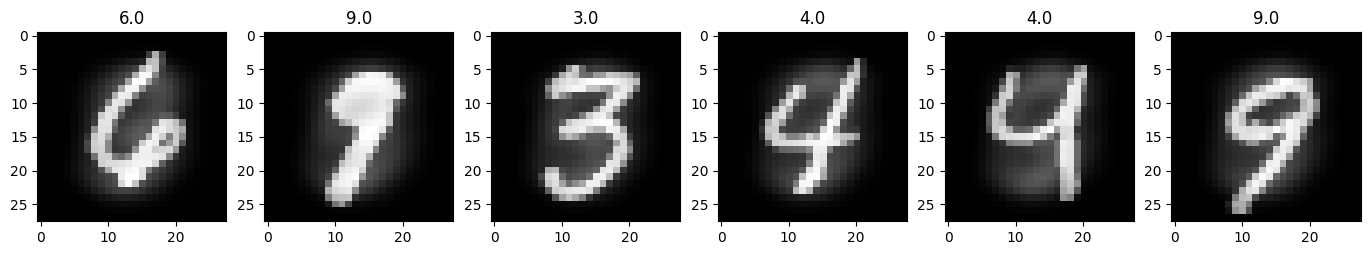

In [53]:
# Исходные изображения
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(X[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title(f"{y[i-1]}")
    plt.imshow(img_.reshape((28, 28)) + X_mean.reshape((28, 28)), cmap='gray')

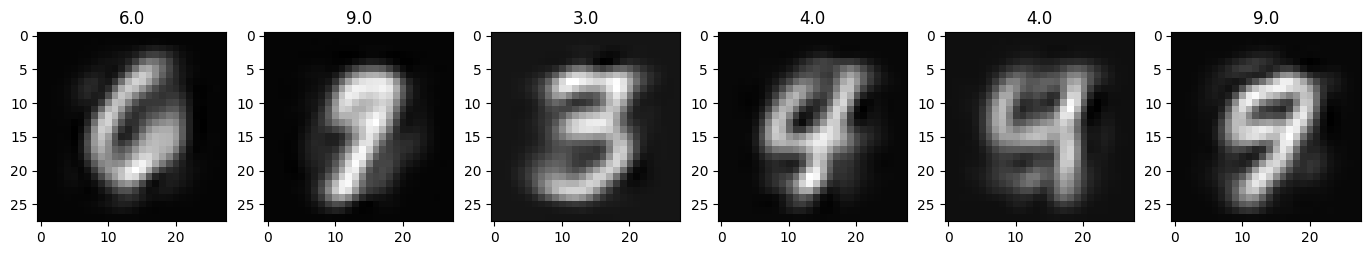

In [54]:
# Восстановленные изображения
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(Xrot_restored[0:6], 1):
    subplot = fig.add_subplot(1, 7, i)
    img_ = img + X_mean
    plt.title(f"{y[i-1]}")
    plt.imshow(img_.reshape((28, 28)) + X_mean.reshape((28, 28)), cmap='gray')

## Визуализация собственных векторов

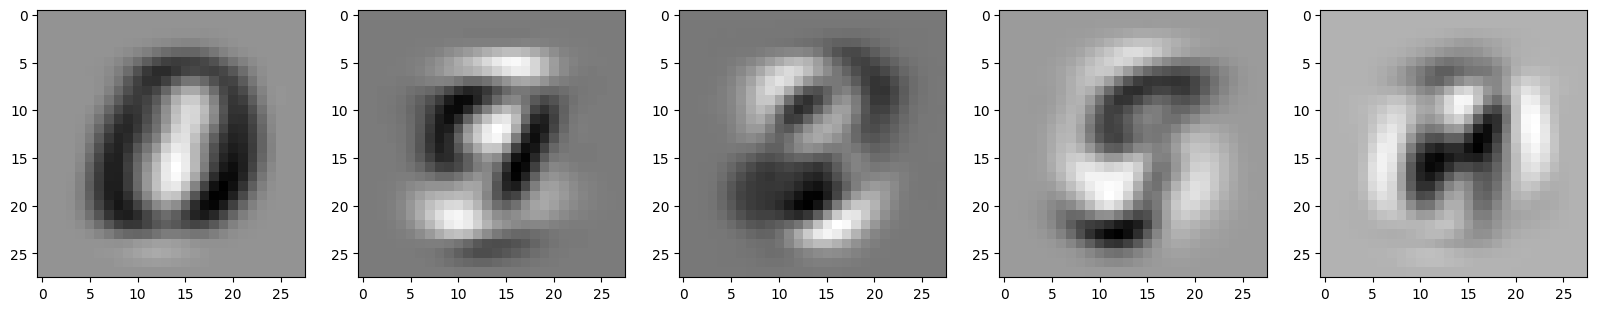

In [57]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(U.T[:5, :], 1):
    subplot = fig.add_subplot(1, 5, i)
    plt.imshow(img.reshape((28, 28)), cmap='gray')